<a href="https://colab.research.google.com/github/TeddyQM/DataSci/blob/main/Feb_28_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input URL of JPG: https://jpeg.org/images/jpeg-home.jpg


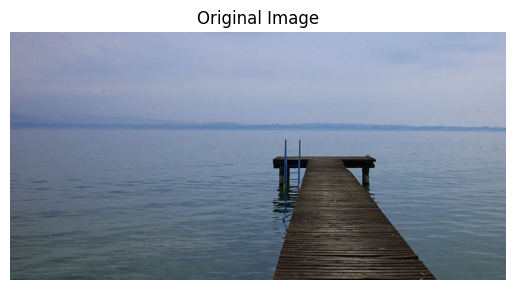

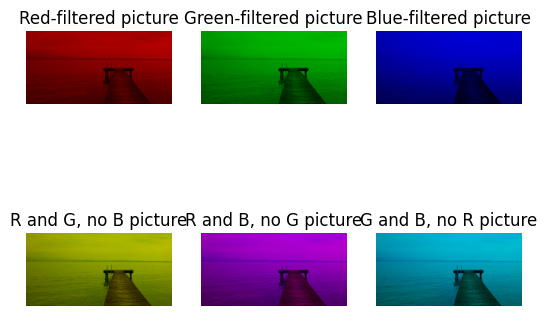

Original image is identical to the combined filtered images: True


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


def red_filter(user_image):
    redcolor_only = user_image.copy()
    redcolor_only[:, :, 1:] = 0
    return redcolor_only

def green_filter(user_image):
    greencolor_only = user_image.copy()
    greencolor_only[:, :, [0, 2]] = 0
    return greencolor_only

def blue_filter(user_image):
    bluecolor_only = user_image.copy()
    bluecolor_only[:, :, :2] = 0
    return bluecolor_only

url_input = input("Input URL of JPG: ")
response = requests.get(url_input)
if response.status_code == 200:
  img2 = Image.open(BytesIO(response.content))
else:
  print("Error: Invalid response status code:", response.status_code)
user_image = np.array(img2)

plt.imshow(user_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

filtered_images = [
    red_filter(user_image),
    green_filter(user_image),
    blue_filter(user_image),
    user_image * np.array([1, 1, 0]),
    user_image * np.array([1, 0, 1]),
    user_image * np.array([0, 1, 1])
]

titles = [
    "Red-filtered picture",
    "Green-filtered picture",
    "Blue-filtered picture",
    "R and G, no B picture",
    "R and B, no G picture",
    "G and B, no R picture"
]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(filtered_images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()

combined_filtered = filtered_images[0] + filtered_images[1] + filtered_images[2]
is_identical = np.array_equal(user_image, combined_filtered)

print("Original image is identical to the combined filtered images:", is_identical)


